![](logo.png)
## Day Objectives
# Decision Tree
- Decision tree is the most powerful and popular tool for classification and prediction
- A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
- A Decision tree is a flowchart like tree structure
- Used  in **data mining** for deriving a strategy to reach a particular goal, its also widely used in machine learning

**Types of Algorithms**
    - CART  - classification and regression algorithm
        - gini index/ gini impurity
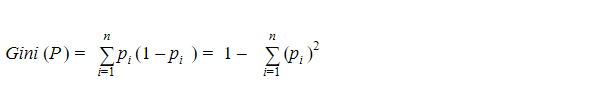
    - ID3  - iterative dechomister 3  
            - Information gain  = 1 - Entropy
            - log function / std deviation
            - Information Gain = Entropy before splitting - Entropy after splitting
            - Maximum Information Gain is 1

**Types of Decision Trees**
 Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
- **Continuous Variable Decision Tree**: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

#### Important Terminology related to Decision Trees


- **Root Node**: It represents the entire sample and this further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

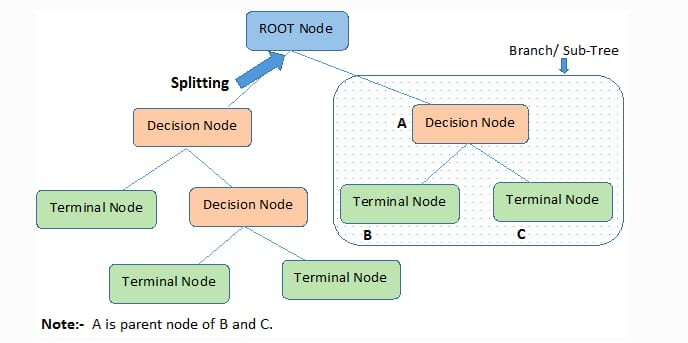

**Advantages**:
    - Simple to understand, interpret, visualize.
    - Decision trees implicitly perform variable screening or feature selection.
    - Can handle both numerical and categorical data. Can also handle multi-output problems.
    - Nonlinear relationships between parameters do not affect tree performance.
**DisAdvantage**:
    - OverFitting Problem
    

# Decision Tree as Classifier

In [1]:
from sklearn.datasets import load_diabetes

In [15]:
from sklearn import datasets


<module 'sklearn.datasets' from 'C:\\Users\\lavan\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\__init__.py'>

In [4]:
diabetes = load_diabetes()

In [8]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [52]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [53]:
# dict into dataframe
import pandas as pd


In [84]:
di = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv")

In [86]:
di

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
di.shape

(768, 9)

In [88]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
X = di[di.columns[:-1]]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [92]:
y = di["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42 )

In [60]:
(442*30)/100

132.6

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dreg = DecisionTreeClassifier()

In [107]:
dreg.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred = dreg.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

In [111]:
accuracy_score(y_test,y_pred)*100

69.26406926406926

In [112]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

In [114]:
di.corr() # correlation - it gives the relation between 2 features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [115]:
X = di[["Glucose", "BMI"]]

In [116]:
y = di["Outcome"]

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42 )

In [129]:
model = DecisionTreeClassifier(max_depth = 3, criterion="gini")

In [171]:
help(model)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [130]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [131]:
pred  = model.predict(X_test)

In [132]:
accuracy_score(y_test,pred)*100

71.86147186147186

# Task
- Take IRIS data set
- Find the corelation
- Apply Decision Tree Classifier

In [133]:
from sklearn import tree
import matplotlib.pyplot as plt

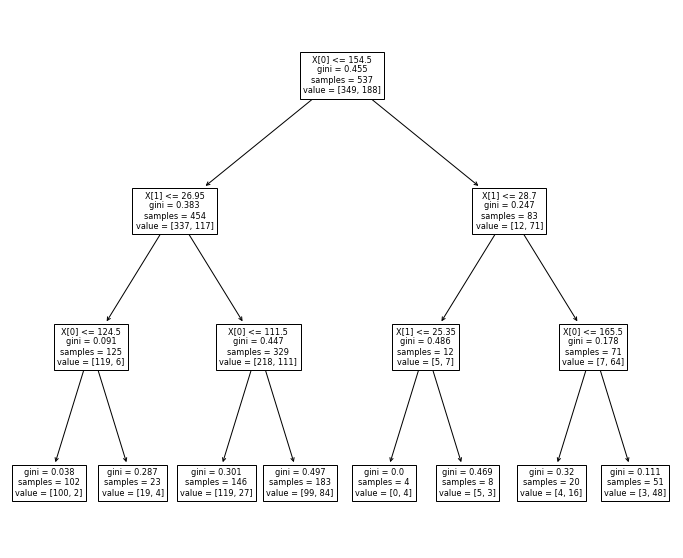

In [136]:
plt.figure(figsize = (12,10))
tree.plot_tree(model)
plt.show()

In [137]:
X_train.shape

(537, 2)

In [139]:
y_test.shape

(231,)

# Decision Tree as Regressor

In [140]:
comp = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/1000_Companies.csv")
comp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [141]:
comp.shape

(1000, 5)

In [142]:
comp.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [143]:
X = comp[["R&D Spend","Administration","Marketing Spend"]]

In [144]:
y = comp["Profit"]

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42 )

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dr = DecisionTreeRegressor(max_depth = 3)

In [162]:
dr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [163]:
y_train.loc[555]


108776.0576

In [164]:
list(X_train.loc[555])

[69933.0, 120785.1196, 203714.9537]

In [165]:
dr.predict([[69933.0, 120785.1196, 203714.9537]])

array([109045.89459899])

In [166]:
107458-108776

-1318

In [167]:
predicted = dr.predict(X_test)

In [168]:
r2_score(y_test,predicted)*100

92.68208778476811

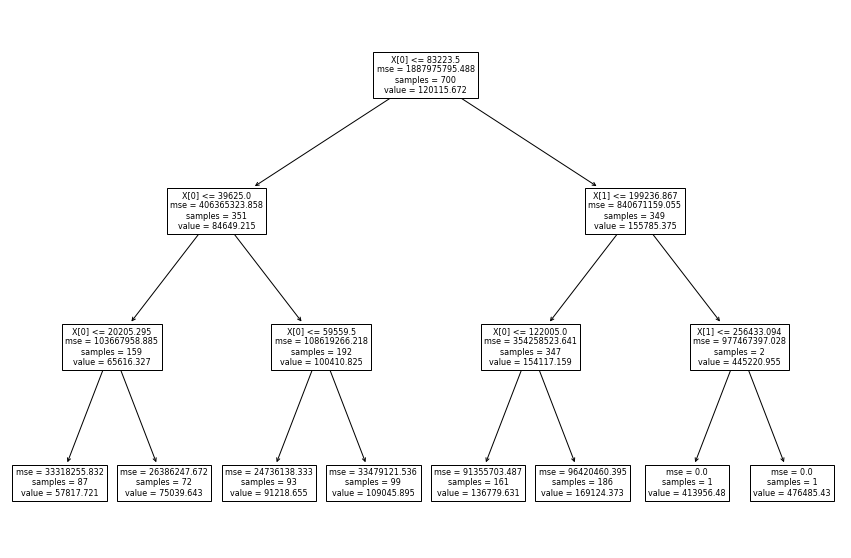

In [170]:
plt.figure(figsize = (15,10))
tree.plot_tree(dr)
plt.show()

# Calculate Gini Index
![](table.png)

$$ Gini = 1 - sum(P(x))^2 $$

 probability of Past Trend


